In [207]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import datetime
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from nltk.stem import WordNetLemmatizer

In [210]:
train_df = pd.read_csv('/content/drive/My Drive/dataset/train_file.csv')

In [211]:
train_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [212]:
test_df = pd.read_csv('/content/drive/My Drive/dataset/test_file.csv')

In [213]:
test_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [214]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [215]:
train_df.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


In [216]:
train_df.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [217]:
test_df.isnull().sum()

IDLink           0
Title            0
Headline         0
Source         101
Topic            0
PublishDate      0
Facebook         0
GooglePlus       0
LinkedIn         0
dtype: int64

In [218]:
train_df['Source'].value_counts()

Bloomberg                                           992
Reuters                                             763
ABC News                                            645
New York Times                                      573
The Guardian                                        551
                                                   ... 
San Francisco Business Times (blog)                   1
Linn's Stamp News                                     1
WRDW-TV                                               1
The Wall Street Journal via Yahoo! Finance India      1
WMTV                                                  1
Name: Source, Length: 4753, dtype: int64

In [219]:
train_df['Source'] = train_df['Source'].fillna('Bloomberg')
test_df['Source'] = test_df['Source'].fillna('Bloomberg')

In [220]:



nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [221]:

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [222]:
stop_words = set(stopwords.words('english'))

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()
def clean_data(text):
    tokens = word_tokenize(text)
    stemmed = [porter.stem(text) for w in tokens ]
    lem_text = [lemmatizer.lemmatize(text, 'v') for word in stemmed]
    cleaned_tokens = ' '.join([w.lower() for w in tokens if w.lower() not in stop_words and len(w) > 2])
    cleaned_tokens = cleaned_tokens.replace(r"[^a-zA-Z]+", '')
    cleaned_tokens = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '  ', cleaned_tokens)
    cleaned_tokens = re.sub(r'\b\d+\b', '', cleaned_tokens)
    processed_text = cleaned_tokens.replace(',', '').replace('.', '').replace(':', '').replace('*','')
    return processed_text
    
    

In [223]:
train_df['Text_Title'] = train_df['Title'] + ' ' + train_df['Source'] + ' ' + train_df['Topic']
test_df['Text_Title'] = test_df['Title'] + ' ' + test_df['Source'] + ' ' + test_df['Topic']

train_df['Text_Headline'] = train_df['Headline'] + ' ' + train_df['Source'] + ' ' + train_df['Topic']
test_df['Text_Headline'] = test_df['Headline'] + ' ' + test_df['Source'] + ' ' + test_df['Topic']

In [224]:
train_df['Text_Title'][2]

'Nouriel Roubini: Global Economy Not Back to 2008 Bloomberg economy'

In [225]:
train_df['Text_Title'] = [clean_data(x) for x in train_df['Text_Title']]

In [226]:
train_df['Text_Title'][2]

'nouriel roubini global economy back  bloomberg economy'

In [227]:
test_df['Text_Title'] = [clean_data(x) for x in test_df['Text_Title']]
train_df['Text_Headline'] = [clean_data(x) for x in train_df['Text_Headline']]
test_df['Text_Headline'] = [clean_data(x) for x in test_df['Text_Headline']]

In [228]:
train_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Text_Title,Text_Headline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,obama lays wreath arlington national cemetery ...,obama lays wreath arlington national cemetery ...
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,look health chinese economy bloomberg economy,tim haywood investment director business-unit ...
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,nouriel roubini global economy back bloomberg...,nouriel roubini nyu professor chairman roubini...
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,finland gdp expands rtt news economy,finland economy expanded marginally three mont...
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,tourism govt spending buoys thai economy janua...,tourism public spending continued boost econom...


In [229]:


vectorizer = TfidfVectorizer()
train_vectors_tt = vectorizer.fit_transform(train_df['Text_Title'])
test_vectors_tt = vectorizer.transform(test_df['Text_Title'])

vectorizer2 = TfidfVectorizer()
train_vectors_hl = vectorizer2.fit_transform(train_df['Text_Headline'])
test_vectors_hl = vectorizer2.transform(test_df['Text_Headline'])

print(train_vectors_tt.shape, test_vectors_tt.shape)
print(train_vectors_hl.shape, test_vectors_hl.shape)

(55932, 25378) (37288, 25378)
(55932, 38755) (37288, 38755)


In [230]:
print(train_vectors_tt[:5])

  (0, 22867)	0.2267969465644793
  (0, 23884)	0.26117801789643164
  (0, 3788)	0.43478374260275054
  (0, 15039)	0.2541784717637535
  (0, 1499)	0.48188943095888903
  (0, 25040)	0.48188943095888903
  (0, 12843)	0.3567828758821637
  (0, 15618)	0.18702064536942564
  (1, 2709)	0.37289055902776347
  (1, 7133)	0.320031564096322
  (1, 4062)	0.46609262810950425
  (1, 10207)	0.5119178713761268
  (1, 13325)	0.5284223537642353
  (2, 1950)	0.3349546931893074
  (2, 9484)	0.27030727379205394
  (2, 19359)	0.5822054678108656
  (2, 15511)	0.592673617053479
  (2, 2709)	0.2677695953257499
  (2, 7133)	0.22981199264730795
  (3, 15229)	0.17735429852858942
  (3, 19412)	0.5419634897624132
  (3, 7948)	0.41835967370710336
  (3, 9285)	0.39595341461145556
  (3, 8531)	0.5725498875993331
  (3, 7133)	0.12330341293404921
  (4, 7504)	0.29926313959381495
  (4, 22585)	0.3416122429107477
  (4, 15038)	0.26740156424143996
  (4, 11846)	0.3009474071846932
  (4, 22584)	0.33653380002810485
  (4, 3300)	0.4579183310860007
  (4, 211

In [231]:

labelencoder = LabelEncoder()
train_df['Topic'] = labelencoder.fit_transform(train_df['Topic'])
test_df['Topic'] = labelencoder.fit_transform(test_df['Topic'])

train_df['Source'] = labelencoder.fit_transform(train_df['Source'])
test_df['Source'] = labelencoder.fit_transform(test_df['Source'])

In [232]:
train_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Text_Title,Text_Headline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,4121,2,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,obama lays wreath arlington national cemetery ...,obama lays wreath arlington national cemetery ...
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",431,0,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,look health chinese economy bloomberg economy,tim haywood investment director business-unit ...
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",431,0,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,nouriel roubini global economy back bloomberg...,nouriel roubini nyu professor chairman roubini...
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,3016,0,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,finland gdp expands rtt news economy,finland economy expanded marginally three mont...
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,3794,0,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,tourism govt spending buoys thai economy janua...,tourism public spending continued boost econom...


In [233]:

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

train_df['title_polarity_score'] = train_df['Title'].apply(lambda x: sid.polarity_scores(x))
train_df['title_compound']  = train_df['title_polarity_score'].apply(lambda score_dict: score_dict['compound'])

train_df['Headline_polarity_score'] = train_df['Headline'].apply(lambda x: sid.polarity_scores(x))
train_df['Headline_compound']  = train_df['Headline_polarity_score'].apply(lambda score_dict: score_dict['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [234]:
train_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Text_Title,Text_Headline,title_polarity_score,title_compound,Headline_polarity_score,Headline_compound
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,4121,2,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,obama lays wreath arlington national cemetery ...,obama lays wreath arlington national cemetery ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.4939
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",431,0,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,look health chinese economy bloomberg economy,tim haywood investment director business-unit ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",431,0,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,nouriel roubini global economy back bloomberg...,nouriel roubini nyu professor chairman roubini...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,3016,0,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,finland gdp expands rtt news economy,finland economy expanded marginally three mont...,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.1027,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,3794,0,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,tourism govt spending buoys thai economy janua...,tourism public spending continued boost econom...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...",0.4019


In [235]:
test_df['title_polarity_score'] = test_df['Title'].apply(lambda x: sid.polarity_scores(x))
test_df['title_compound']  = test_df['title_polarity_score'].apply(lambda score_dict: score_dict['compound'])

test_df['Headline_polarity_score'] = test_df['Headline'].apply(lambda x: sid.polarity_scores(x))
test_df['Headline_compound']  = test_df['Headline_polarity_score'].apply(lambda score_dict: score_dict['compound'])


In [236]:
test_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,Text_Title,Text_Headline,title_polarity_score,title_compound,Headline_polarity_score,Headline_compound
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,433,0,2016-03-29 01:41:12,0,0,1,sliding economy fights back n3trn tsa funds bu...,budget passed national assembly n3trillion wa...,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.4019,"{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'comp...",-0.5994
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,739,1,2016-03-29 01:41:27,121,2,13,microsoft shows hololens bring distant family ...,recent microsoft research video shows augment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,879,1,2016-03-29 01:47:00,12,1,0,microsoft twitter robot praises hitler trump r...,microsoft teamed bing create taytweets account...,"{'neg': 0.304, 'neu': 0.444, 'pos': 0.252, 'co...",-0.1779,"{'neg': 0.083, 'neu': 0.805, 'pos': 0.112, 'co...",-0.0000
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,345,0,2016-03-29 02:00:00,0,0,3,flood central bank moves n't get world economy...,central bankers managed steer world economy cl...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.22, 'neu': 0.706, 'pos': 0.073, 'com...",-0.6369
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",1015,0,2016-03-29 02:01:07,3,0,0,usd/jpy bears lining mixed us economy outlook ...,however streak seven-day gains might end marke...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",0.6705


In [237]:

test_df['Weakday'] = test_df['PublishDate'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%w"))



In [238]:
train_df['Weakday'] = train_df['PublishDate'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%w"))

In [239]:
train_df["hour"] = train_df["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])
test_df["hour"] = test_df["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])

Text(0, 0.5, 'Headline Sentiment')

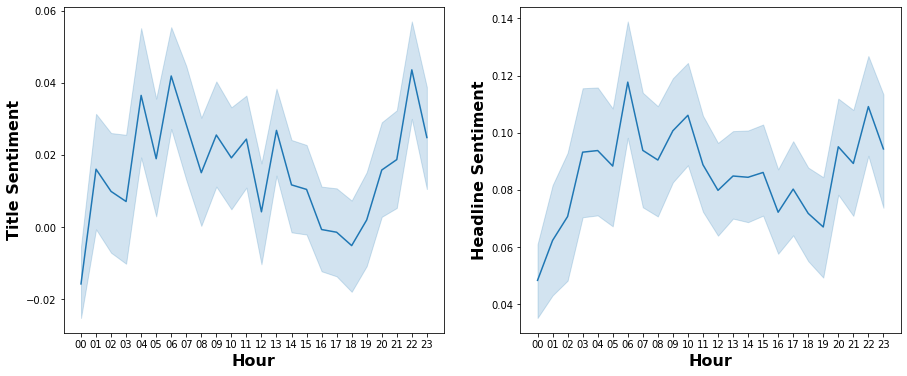

In [240]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.lineplot(train_df["hour"], train_df["title_compound"], ax=ax[0] )
ax[0].set_xlabel('Hour', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Title Sentiment', fontsize = 16, fontdict=dict(weight='bold'))

sns.lineplot(train_df["hour"], train_df["Headline_compound"], ax=ax[1])
ax[1].set_xlabel('Hour', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Headline Sentiment', fontsize = 16, fontdict=dict(weight='bold'))



Text(0, 0.5, 'Headline Sentiment')

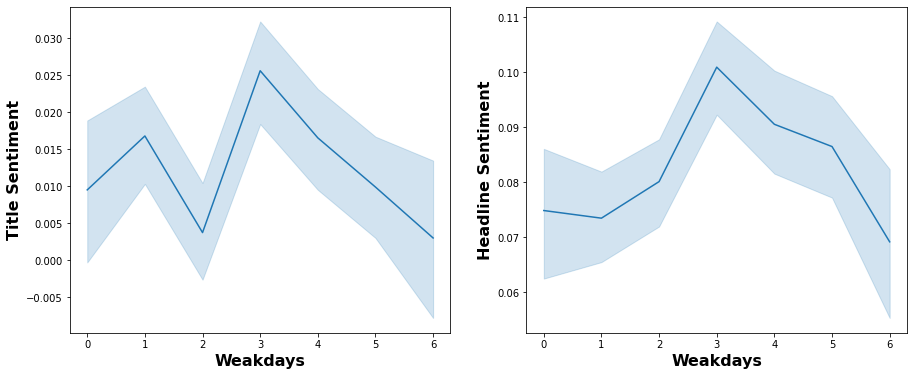

In [241]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.lineplot(train_df["Weakday"], train_df["title_compound"], ax=ax[0])
ax[0].set_xlabel('Weakdays', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Title Sentiment', fontsize = 16, fontdict=dict(weight='bold'))

sns.lineplot(train_df["Weakday"], train_df["Headline_compound"], ax=ax[1])
ax[1].set_xlabel('Weakdays', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Headline Sentiment', fontsize = 16, fontdict=dict(weight='bold'))

In [242]:

scaler = StandardScaler()

Columns=['Source','Topic','Facebook','GooglePlus','LinkedIn','Headline_compound','title_compound','Weakday','hour']

for x in Columns:
  train_df[x] = scaler.fit_transform(train_df[x].values.reshape(-1, 1))
  test_df[x] = scaler.transform(test_df[x].values.reshape(-1, 1))



In [243]:
Headline_Columns=['Source','Topic','Facebook','GooglePlus','LinkedIn','Headline_compound','Weakday','hour']

train_hl = train_df[Headline_Columns]
test_hl = test_df[Headline_Columns]

Title_Columns=['Source','Topic','Facebook','GooglePlus','LinkedIn','title_compound','Weakday','hour']

train_tt = train_df[Title_Columns]
test_tt = test_df[Title_Columns]

In [244]:
train_hl.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,Headline_compound,Weakday,hour
0,1.249746,0.841443,-0.184044,-0.262649,-0.199608,0.944363,-0.484554,-1.699073
1,-1.323992,-1.108773,-0.184044,-0.262649,-0.199608,-0.192873,1.789923,-1.699073
2,-1.323992,-1.108773,-0.184044,-0.262649,-0.199608,-0.192873,1.789923,-1.699073
3,0.479020,-1.108773,-0.184044,-0.262649,-0.199608,-0.192873,-1.621793,-1.699073
4,1.021667,-1.108773,-0.184044,-0.262649,-0.199608,0.732528,-1.621793,-1.699073


In [245]:

train_tt.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,title_compound,Weakday,hour
0,1.249746,0.841443,-0.184044,-0.262649,-0.199608,-0.039213,-0.484554,-1.699073
1,-1.323992,-1.108773,-0.184044,-0.262649,-0.199608,-0.039213,1.789923,-1.699073
2,-1.323992,-1.108773,-0.184044,-0.262649,-0.199608,-0.039213,1.789923,-1.699073
3,0.479020,-1.108773,-0.184044,-0.262649,-0.199608,0.265642,-1.621793,-1.699073
4,1.021667,-1.108773,-0.184044,-0.262649,-0.199608,-0.039213,-1.621793,-1.699073


In [246]:

train_tt_x = hstack([train_vectors_tt, csr_matrix(train_tt.values)])
test_tt_x = hstack([test_vectors_tt, csr_matrix(test_tt.values)])
y1 = train_df['SentimentTitle']

train_hl_x = hstack([train_vectors_hl, csr_matrix(train_hl.values)])
test_hl_x = hstack([test_vectors_hl, csr_matrix(test_hl.values)])
y2 = train_df['SentimentHeadline']

In [256]:


X_train, X_test, y_train, y_test = train_test_split(train_tt_x, y2, test_size=0.3, random_state=32)
clf1 = LinearSVR(C=0.2)
clf1.fit(X_train, y_train)
y_predict = clf1.predict(X_test)
MAE_1 = mean_absolute_error(y_predict, y_test)

print('MAE',MAE_1)

MAE 0.10965799618532109


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [257]:

X_train, X_test, y_train, y_test = train_test_split(train_hl_x, y2, test_size=0.3, random_state=32)
clf2 = LinearSVR(C=0.3)
clf2.fit(X_train, y_train)
y_predict = clf2.predict(X_test)
MAE_2 = mean_absolute_error(y_predict, y_test)

print('MAE',MAE_2)

MAE 0.07182406818944198


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [258]:
print('MAE  ', 1 - ((0.4 * MAE_1) + (0.6 * MAE_2)))

MAE   0.9130423606122063


In [255]:
title = clf1.predict(test_tt_x)
headline = clf2.predict(test_hl_x)
df = pd.DataFrame()
df['IDLink'] = test_df['IDLink']
df['SentimentTitle'] = title
df['SentimentHeadline'] = headline
df.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,-0.183402,0.002483
1,DVAaGErjlF,-0.015105,0.050337
2,OT9UIZm5M2,-0.073564,-0.117245
3,lflGp3q2Fj,-0.043689,-0.158227
4,zDYG0SoovZ,0.075598,0.140989


In [251]:
df.to_csv('/content/drive/My Drive/dataset/sample_submissions.csv', index=False)